# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [69]:
# Your code here
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline


Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [70]:
# Your code here
df = pd.read_csv("data/ames.csv", index_col=0)

The following code checks that you loaded the data correctly:

In [71]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [72]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [73]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

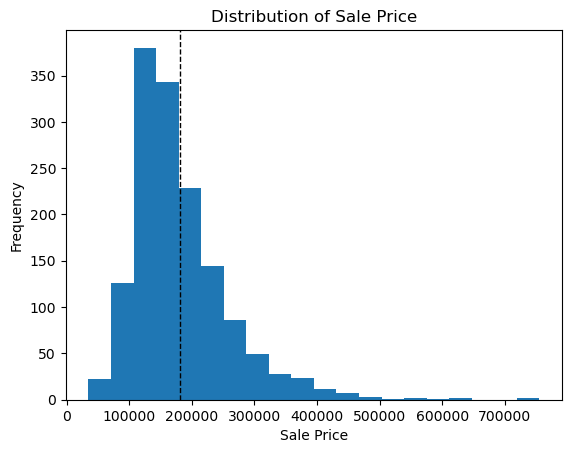

In [74]:
# Your code here

# Plot a histogram of SalePrice
plt.hist(df["SalePrice"], bins=20)
plt.axvline(df["SalePrice"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()




Now, print out the mean, median, and standard deviation:

In [75]:
# Your code here
saleprice_mean = df["SalePrice"].mean()
saleprice_median = df["SalePrice"].median()
saleprice_std = df["SalePrice"].std()
print(f"Mean: {saleprice_mean:.2f}")
print(f"Median: {saleprice_median:.2f}")
print(f"Standard Deviation: {saleprice_std:.2f}")
print()



Mean: 180921.20
Median: 163000.00
Standard Deviation: 79442.50



In the cell below, interpret the above information.

In [76]:
# Replace None with appropriate text
"""
The mean sale price of a property in the dataset is $180,921.20,
 while the median sale price is $163000.00.
 This indicates that the distribution of sale prices
  is skewed to the right,with some higher priced properties 
  increasing the mean. 
  The standard deviation of sale prices is $79442.50,
   indicating that there is a wide range of sale prices 
   in the dataset.
"""

'\nThe mean sale price of a property in the dataset is $180,921.20,\n while the median sale price is $163000.00.\n This indicates that the distribution of sale prices\n  is skewed to the right,with some higher priced properties \n  increasing the mean. \n  The standard deviation of sale prices is $79442.50,\n   indicating that there is a wide range of sale prices \n   in the dataset.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

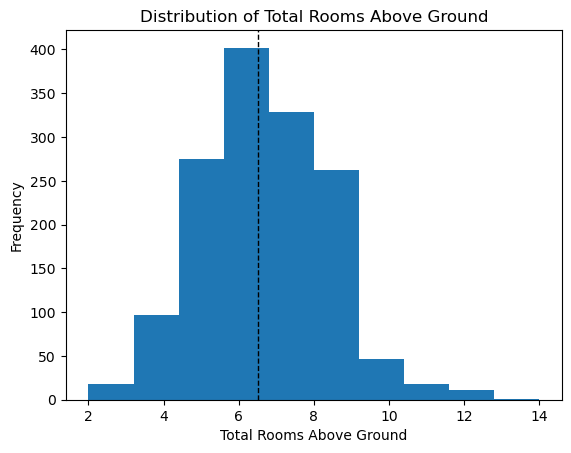

In [77]:
# Your code here
plt.hist(df["TotRmsAbvGrd"], bins=10)
plt.axvline(df["TotRmsAbvGrd"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of Total Rooms Above Ground")
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("Frequency")
plt.show()




Now, print out the mean, median, and standard deviation:

In [78]:
# Your code here
totrms_mean = df["TotRmsAbvGrd"].mean()
totrms_median = df["TotRmsAbvGrd"].median()
totrms_std = df["TotRmsAbvGrd"].std()
print(f"Mean: {totrms_mean:.2f}")
print(f"Median: {totrms_median:.2f}")
print(f"Standard Deviation: {totrms_std:.2f}")
print()




Mean: 6.52
Median: 6.00
Standard Deviation: 1.63



In the cell below, interpret the above information.

In [79]:
# Replace None with appropriate text
"""
The mean and median of the TotRmsAbvGrd variable are both around 6, which suggests that the distribution is roughly symmetric. 
The standard deviation of 1.63 indicates that the values are relatively tightly clustered around the mean. 
The histogram of the distribution of total rooms above ground confirms that it is roughly symmetric and centered around 6.
"""

'\nThe mean and median of the TotRmsAbvGrd variable are both around 6, which suggests that the distribution is roughly symmetric. \nThe standard deviation of 1.63 indicates that the values are relatively tightly clustered around the mean. \nThe histogram of the distribution of total rooms above ground confirms that it is roughly symmetric and centered around 6.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

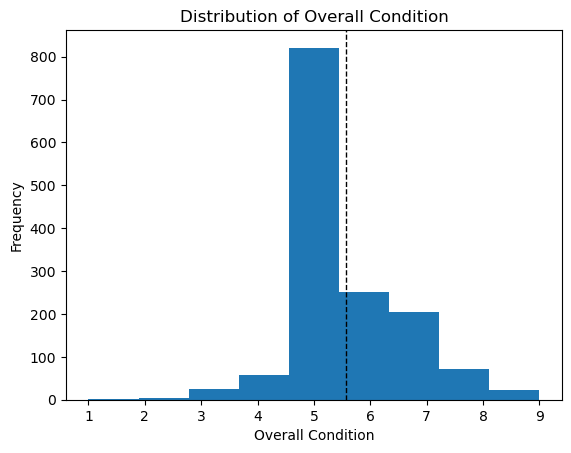

In [80]:
# Your code here
plt.hist(df["OverallCond"], bins=9)
plt.axvline(df["OverallCond"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of Overall Condition")
plt.xlabel("Overall Condition")
plt.ylabel("Frequency")
plt.show()


Now, print out the mean, median, and standard deviation:

In [81]:
# Your code here
overallcond_mean = df["OverallCond"].mean()
overallcond_median = df["OverallCond"].median()
overallcond_std = df["OverallCond"].std()
print(f"Mean: {overallcond_mean:.2f}")
print(f"Median: {overallcond_median:.2f}")
print(f"Standard Deviation: {overallcond_std:.2f}")
print()


Mean: 5.58
Median: 5.00
Standard Deviation: 1.11



In the cell below, interpret the above information.

In [82]:
# Replace None with appropriate text
"""
The histogram shows the distribution of the "OverallCond" variable in the Ames housing dataset.
The x-axis represents the overall condition ratings of the houses, which range from 1 (very poor) to 10 (very excellent),
 and the y-axis represents the frequency of houses in each bin.

The mean overall condition rating is 5.58, which indicates that the average house in the dataset is in slightly above average condition. 
The median overall condition rating is also 5, which suggests that the distribution is roughly symmetric. 
The standard deviation of the overall condition rating is 1.11, which indicates that the ratings are relatively tightly clustered around the mean.

Overall, the histogram shows that the majority of houses in the dataset have an overall condition rating between 5 and 7,
 with a smaller number of houses having ratings of 3 or below or 9 or above.
"""

'\nThe histogram shows the distribution of the "OverallCond" variable in the Ames housing dataset.\nThe x-axis represents the overall condition ratings of the houses, which range from 1 (very poor) to 10 (very excellent),\n and the y-axis represents the frequency of houses in each bin.\n\nThe mean overall condition rating is 5.58, which indicates that the average house in the dataset is in slightly above average condition. \nThe median overall condition rating is also 5, which suggests that the distribution is roughly symmetric. \nThe standard deviation of the overall condition rating is 1.11, which indicates that the ratings are relatively tightly clustered around the mean.\n\nOverall, the histogram shows that the majority of houses in the dataset have an overall condition rating between 5 and 7,\n with a smaller number of houses having ratings of 3 or below or 9 or above.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [83]:
# Replace None with appropriate code
below_average_condition = df[df["OverallCond"] <5 ]
average_condition = df[df["OverallCond"] ==5 ]
above_average_condition = df[df["OverallCond"] >5 ]

The following code checks that you created the subsets correctly:

In [84]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

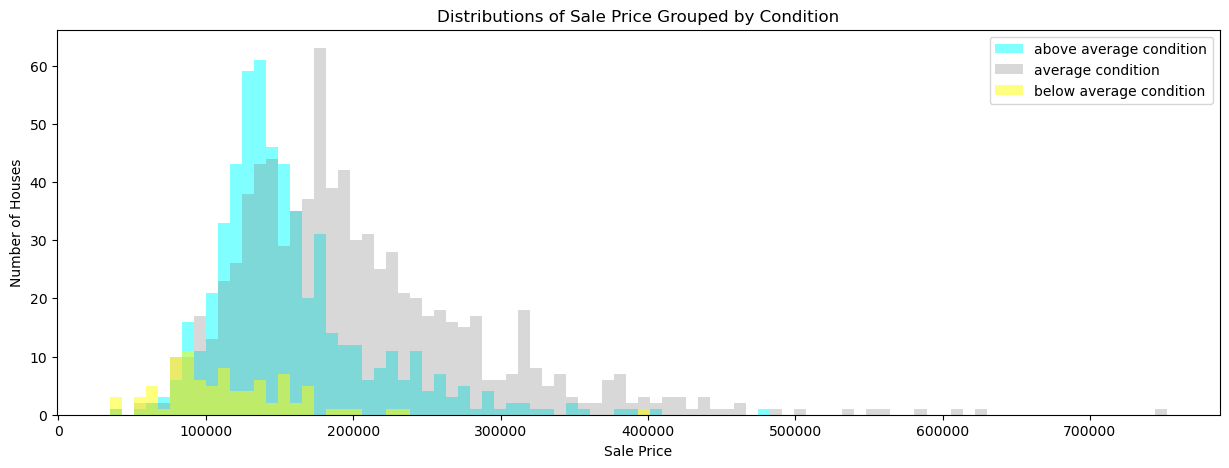

In [85]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [86]:
# Replace None with appropriate text
"""
The plot above shows the distributions of Sale Price for three different groups of houses based on their overall condition: above average, average, and below average. 
The x-axis shows the sale price, and the y-axis shows the number of houses.

The above average condition houses (cyan bars) have a higher sale price on average than the average condition (gray bars) and below average condition (yellow bars) houses. 
The distribution of sale price for the above average condition houses is also skewed to the right, indicating that there are more houses with higher sale prices in this group.

The average condition houses have a wider distribution of sale prices than the above average and below average condition houses, and there are more houses in this group overall.

The below average condition houses have the lowest average sale price of the three groups, and their distribution is skewed to the left, indicating that there are more houses with lower sale prices in this group.


One surprising aspect of this plot is that the distribution of sale price
for houses in above average condition appears to be shifted to the right meaning higher sale prices 
compared to those in average and below average condition.
This suggests that the condition of a house may have a strong relationship with its sale price, 
 as houses in better condition may be more desirable to buyers and therefore command a higher price.



"""

'\nThe plot above shows the distributions of Sale Price for three different groups of houses based on their overall condition: above average, average, and below average. \nThe x-axis shows the sale price, and the y-axis shows the number of houses.\n\nThe above average condition houses (cyan bars) have a higher sale price on average than the average condition (gray bars) and below average condition (yellow bars) houses. \nThe distribution of sale price for the above average condition houses is also skewed to the right, indicating that there are more houses with higher sale prices in this group.\n\nThe average condition houses have a wider distribution of sale prices than the above average and below average condition houses, and there are more houses in this group overall.\n\nThe below average condition houses have the lowest average sale price of the three groups, and their distribution is skewed to the left, indicating that there are more houses with lower sale prices in this group.\n\

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [87]:
# Your code here

correlation_series = df.corr()['SalePrice'].sort_values()

max_corr_value = correlation_series.iloc[-2]
max_corr_column = correlation_series.index[-2]
print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Most Positively Correlated Column: OverallQual
Maximum Correlation Value: 0.7909816005838053


C:\Users\Virginia\AppData\Local\Temp\ipykernel_1508\3920712560.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_series = df.corr()['SalePrice'].sort_values()


Now, find the ***most negatively correlated*** column:

In [88]:
# Your code here
min_corr_value = correlation_series.iloc[0]
min_corr_column = correlation_series.index[0]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Most Negatively Correlated Column: KitchenAbvGr
Minimum Correlation Value: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

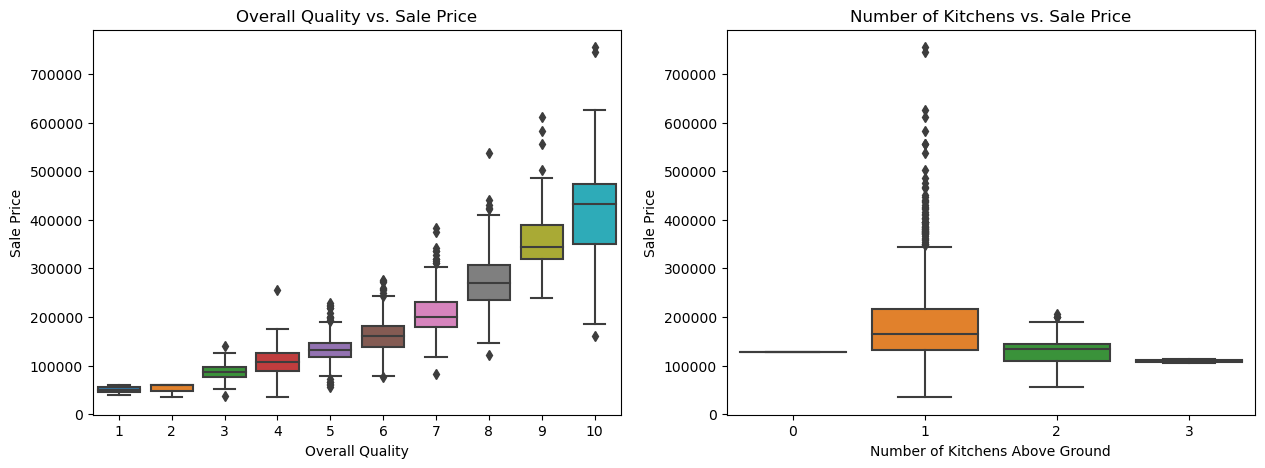

In [89]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_corr_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[min_corr_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality vs. Sale Price")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("Number of Kitchens vs. Sale Price")
ax2.set_xlabel("Number of Kitchens Above Ground")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [90]:
# Replace None with appropriate text
"""
The plot on the left shows the relationship between the Overall Quality of a house and its Sale Price. 
As expected, there is a clear positive correlation between these two variables. As the Overall Quality increases, so does the Sale Price.

The plot on the right shows the relationship between the Number of Kitchens Above Ground and the Sale Price of a house.
 There does not appear to be a strong relationship between these two variables. 
 There are some outliers where a house with more than one kitchen above ground is sold at a lower price,
  but in general, the number of kitchens above ground does not seem to be a major factor in determining the sale price of a house.
"""
"""
The column with the highest correlation is overall quality.
According to the data description:

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
it is somewhat difficult to understand how this is different from
OverallCond, which has similar values.

There is a clear positive relationship between overall quality and
sale price, although it looks like potentially an exponential
relationship rather than a linear one. For example, the minimum
"non-outlier" (Q1 - 1.5*IQR) home with quality 10 (Very Excellent)
sells for about the same price as the median home with quality 6
(Above Average).

The column with the most negative correlation is the number of 
kitchens above ground. According to the data description:

KitchenAbvGr: Kitchens above grade

From the plot, it is clear that almost all houses have 1 or 2
kitchens above grade, although there are some with 0 or 3.

Somewhat similar to the earlier OverallCond discussion, it seems
that more kitchens are associated with lower price, which is
somewhat counterintuitive. Essentially all of the houses with 2
kitchens sold for less than $200,000, whereas homes with 1 kitchen
sometimes sold for much more.

One thing we might want to investigate is what kinds of homes have
two kitchens. Are they also homes with low quality, possibly student
housing at Iowa State University?
"""

'\nThe column with the highest correlation is overall quality.\nAccording to the data description:\n\nOverallQual: Rates the overall material and finish of the house\n\n       10\tVery Excellent\n       9\tExcellent\n       8\tVery Good\n       7\tGood\n       6\tAbove Average\n       5\tAverage\n       4\tBelow Average\n       3\tFair\n       2\tPoor\n       1\tVery Poor\nit is somewhat difficult to understand how this is different from\nOverallCond, which has similar values.\n\nThere is a clear positive relationship between overall quality and\nsale price, although it looks like potentially an exponential\nrelationship rather than a linear one. For example, the minimum\n"non-outlier" (Q1 - 1.5*IQR) home with quality 10 (Very Excellent)\nsells for about the same price as the median home with quality 6\n(Above Average).\n\nThe column with the most negative correlation is the number of \nkitchens above ground. According to the data description:\n\nKitchenAbvGr: Kitchens above grade\n\nF

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [91]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

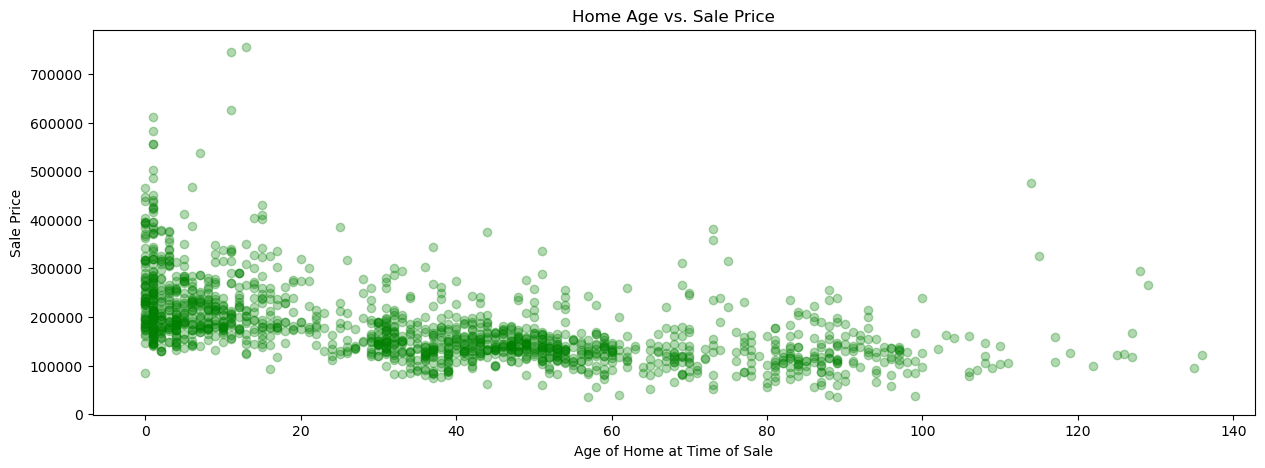

In [92]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
The scatter plot shows that there is a slight negative correlation between the age of a home and its sale price, 
which means that as the age of the home increases, the sale price tends to decrease slightly. 
However, it is important to note that there are many outliers and the correlation is not very strong.

In general, newer houses appear to be more valuable, with value increasing
as homes age. Interestingly the variance seems to increase once the home
age goes over 100 years, with several above-average sale prices and fewer
home sales in general.

We are also seeing potential housing booms and busts over the past decades,
indicated by e.g. relatively few 20-year-old houses compared to 25-year-old houses
being sold. We might find something interesting if we investigate this further.

"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.